# Implementing the Perceptron Algorithm

In this lab, we'll implement the basic function to help us implement the Perceptron Algorithm, we'll start with some functions that will help us plot and visualize the data.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting functions for both points and lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

In the next section we will define the main function for the Perceptron Algorithm, this Algorithm will be based on Discrete activation function

In [9]:
# Activation (step) function, Discrete Function
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

# Prediction function concatenate the perceptron function to a step function
def prediction(X, W, b):
    return stepFunction((np.dot(X,W)+b))

# Perceptron weight/bias update
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    

## Perceptron Algorithm 

In [10]:
# Perceptron Algorithm function, epochs are the number of iterations of the Algorithm
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

## Data Extraction

In [11]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

# Data extraction
data = pd.read_csv('DataSet1.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

# X separation based on label(y)
condition = (y[:] == 0)

X_neg = X[condition]
X_pos= X[np.invert(condition)]

## Algorithm Execution and Plotting

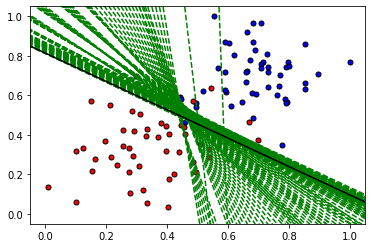

In [12]:
# Main program execution
boundary_lines = trainPerceptronAlgorithm(X,y)

# Plotting 
plt.figure()

# Lines plot
for i in range(len(boundary_lines)):
    display(boundary_lines[i][0],boundary_lines[i][1])
    
# Black color for the last line
display(boundary_lines[i][0],boundary_lines[i][1], 'black')

# Plot points
plot_points(X,y)